<a href="https://colab.research.google.com/github/EiffL/sfh-inference-hackathon/blob/main/notebooks/Intro_Hackathon_Astroinfo21_SFHs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

# TNG100 SEDs (No dust)
The objective is to predict the SFHs (middle column) or time at which half of the stellar mass has been built (right column) using the galaxy Spetral Energy Distribution (SED, left column)

The SEDs shown here do not contain dust emission. Therefore they lack of realism, especially at longer wavelengths. However, the sample is large.

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, m

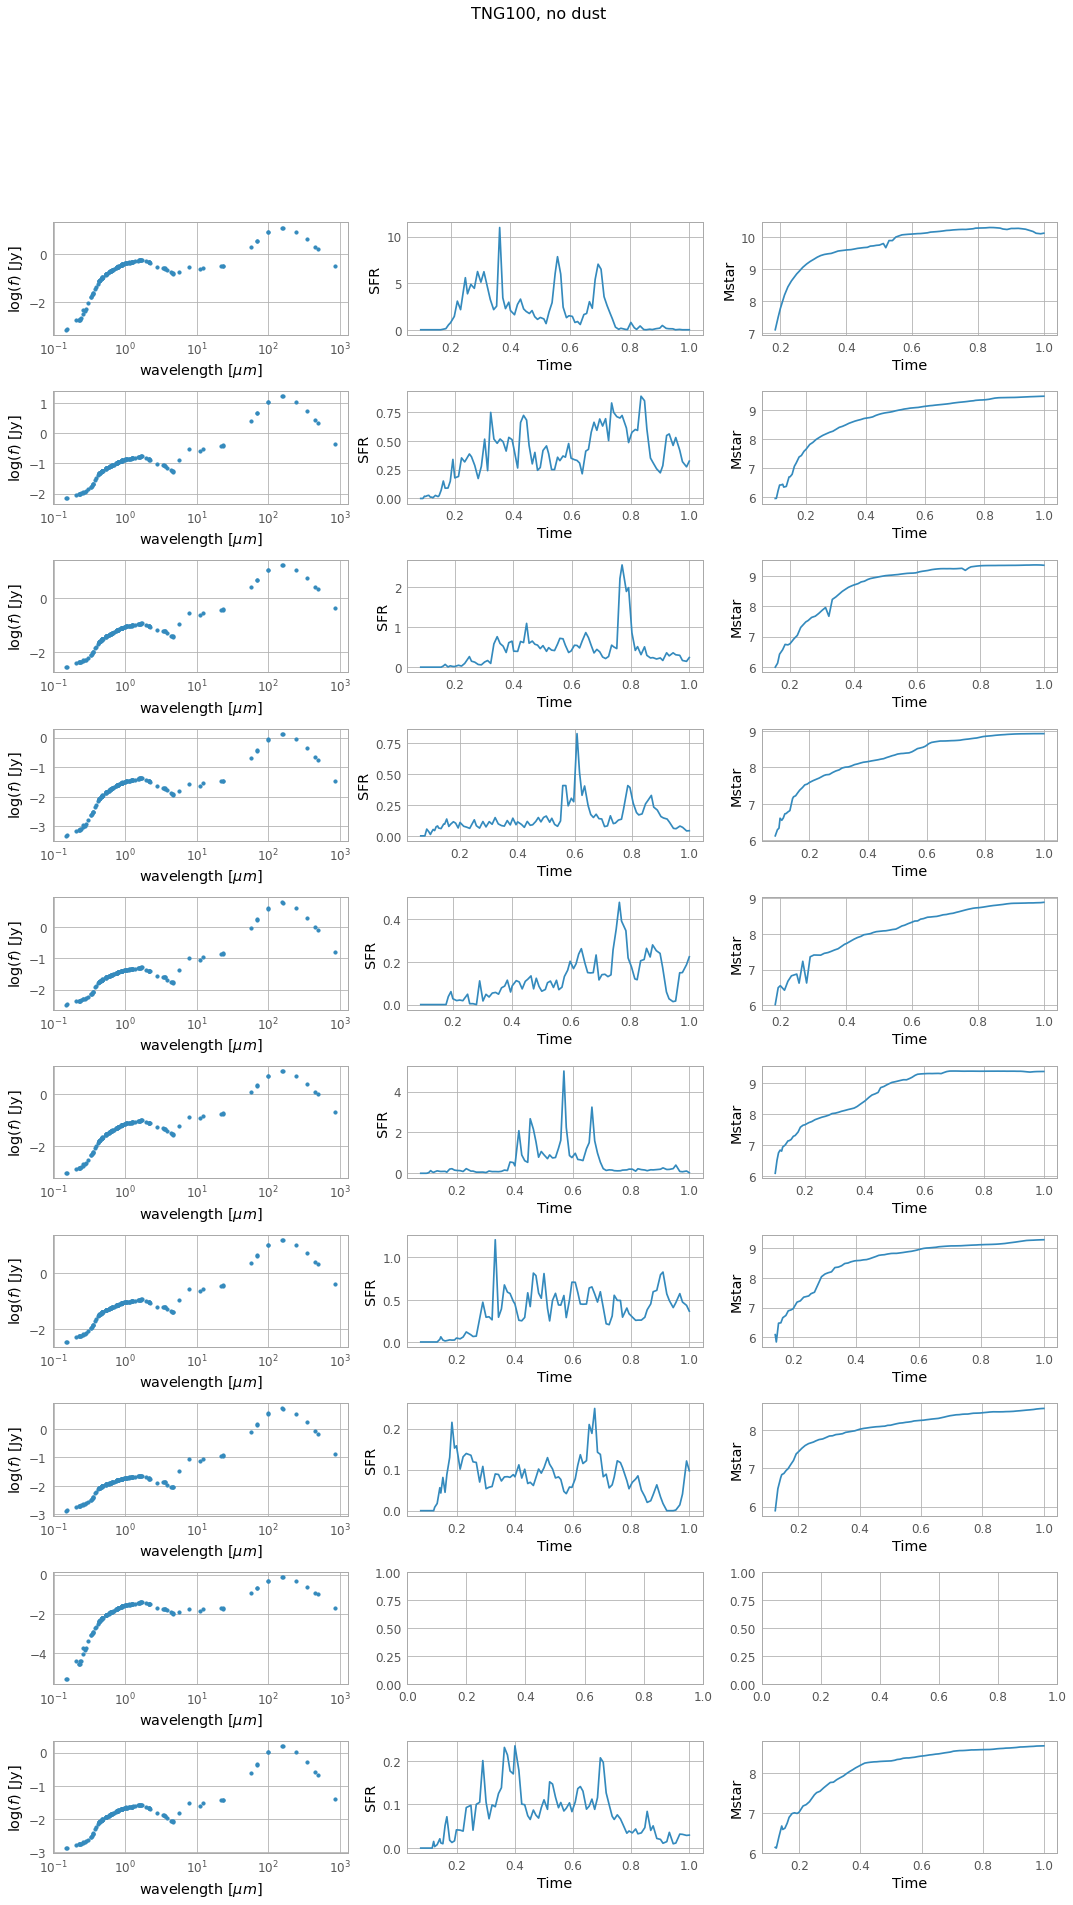

In [ ]:

from numpy import random
from numpy import loadtxt

# load catalogs
cat_path = "$ALL_CCFRWORK/SFH/tng100/phot_TNG100_dylan_143.csv"
phot_cat = pd.read_csv(cat_path)
sfh_path = "$ALL_CCFRWORK/SFH/tng100/cats_SFH/"
wl = loadtxt('$ALL_CCFRWORK/SFH/tng100/wl.csv', delimiter=',')/10**4

#index pandas table
shids = phot_cat['subhaloIDs']
phot_cat.set_index("subhaloIDs", inplace=True)
phot_cat.head()

#plot figures
fig, axs = plt.subplots(10, 3)
fig.set_size_inches(18, 30)
fig.suptitle("TNG100, no dust", fontsize=16)
for index in range(10):
    sh = int(shids[index+random.randint(0,high=len(shids)-20)])
    obj=phot_cat.loc[sh][:]
    #apparent mags
    app_mag = obj.values+5*(np.log10(20e6)-1) #assume at 20pc
    flux = 10**(.4*(-app_mag[np.array(wl)<10**3]+8.90)) #convert to Jy
    axs[index, 0].scatter(np.array(wl)[np.array(wl)<10**3],np.log10(flux),s=10)
    axs[index, 0].set_xlabel("wavelength [$\mu m$]")
    axs[index, 0].set_xscale('log')
    try:
      sfh = pd.read_csv(sfh_path+"TNG100_mainprojenitors_"+str(sh)+".csv")
    except:
      continue  
    axs[index, 0].set_ylabel("$\log(f)$ [Jy]")
    axs[index, 1].set_xlabel("Time")
    axs[index, 1].set_ylabel("SFR")
    axs[index, 1].plot(sfh.time,sfh.SFR_halfRad)
    axs[index, 2].plot(sfh.time,np.log10(sfh.Mstar_Half)+10)
    axs[index, 2].set_xlabel("Time")
    axs[index, 2].set_ylabel("Mstar")
plt.savefig("$WORK/TNG100_examples.pdf")

#Images
In addition to photometric information, we also have mock images for all the galaxies in the sample. The following cell shows an example of an image without and with noise added (SDSS)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Mstar')

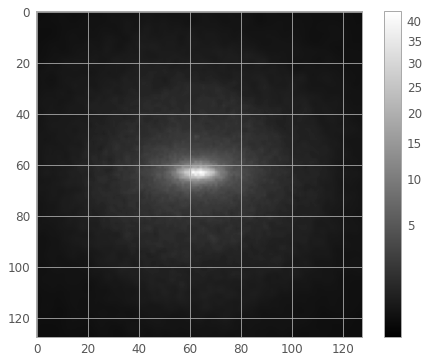

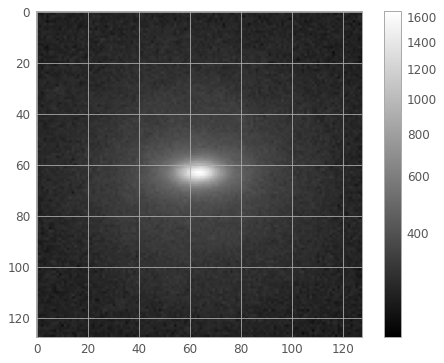

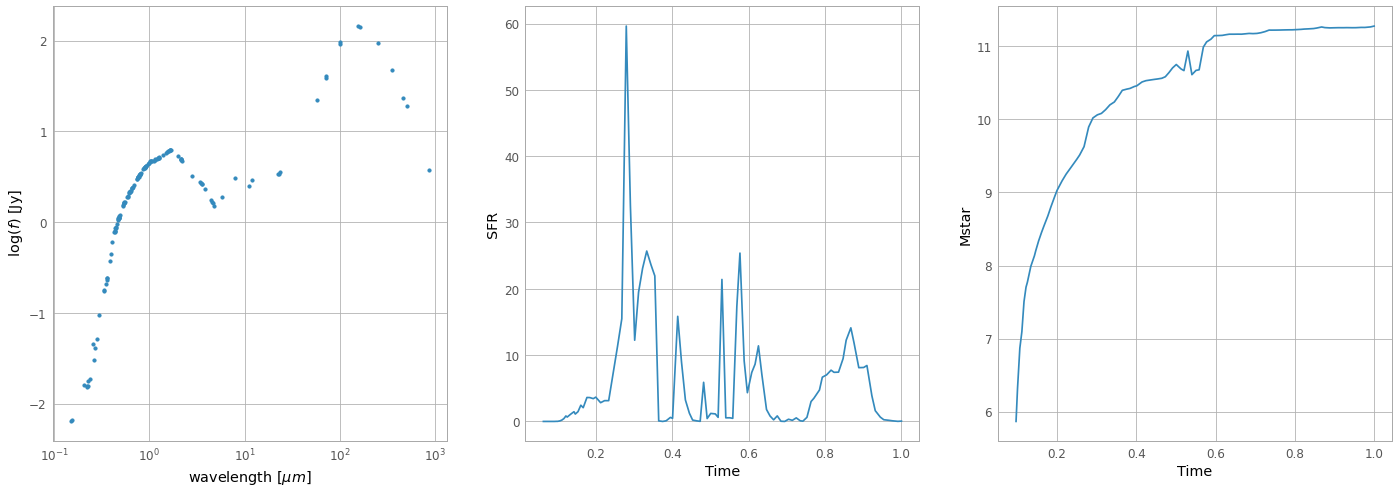

In [ ]:
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from astropy.visualization import simple_norm

shid=1

#noiseless image
image_path = "$ALL_CCFRWORK/SFH/tng100/images/TNG100/sdss/sn99/noiseless"
image_file = image_path+'/broadband_'+str(int(shid))+'.fits'
image_data = fits.getdata(image_file, ext=0)
plt.figure()
fig.suptitle("Noiseless image", fontsize=16)
norm = simple_norm(image_data[3,:,:], 'sqrt')
shape = image_data[3,:,:].shape

plt.imshow(image_data[3,int(shape[0]/2)-64:int(shape[0]/2)+64,int(shape[1]/2)-64:int(shape[1]/2)+64], cmap='gray',norm=norm)
plt.colorbar()


#image with noise + SDSS PSF
image_path = "$ALL_CCFRWORK/SFH/tng100/images/TNG100/sdss/sn99/Outputs/i"
image_file = image_path+'/broadband_'+str(int(shid))+'_FullReal.fits_i_band_FullReal.fits'
image_data = fits.getdata(image_file, ext=0)
plt.figure()
fig.suptitle("SDSS image", fontsize=16)
norm = simple_norm(image_data, 'sqrt')
plt.imshow(image_data, cmap='gray', norm=norm)
plt.colorbar()



fig, axs = plt.subplots(1, 3)
fig.set_size_inches(24, 8)
obj=phot_cat.loc[shid][:]
app_mag = obj.values+5*(np.log10(20e6)-1) #assume at 20pc
flux = 10**(.4*(-app_mag[np.array(wl)<10**3]+8.90)) #convert to Jy
axs[0].scatter(np.array(wl)[np.array(wl)<10**3],np.log10(flux),s=10)

axs[0].set_xlabel("wavelength [$\mu m$]")
axs[0].set_ylabel(' $\log(f)$ [Jy]')
axs[0].set_xscale('log')

try:
  sfh = pd.read_csv(sfh_path+"TNG100_mainprojenitors_"+str(shid)+".csv")
except:
  print("not found")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("SFR")
axs[1].plot(sfh.time,sfh.SFR_halfRad)
axs[2].plot(sfh.time,np.log10(sfh.Mstar_Half)+10)
axs[2].set_xlabel("Time")
axs[2].set_ylabel("Mstar")



# TNG50, with dust
There are 3000 galaxies modeled with SKIRT with dust.

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, m

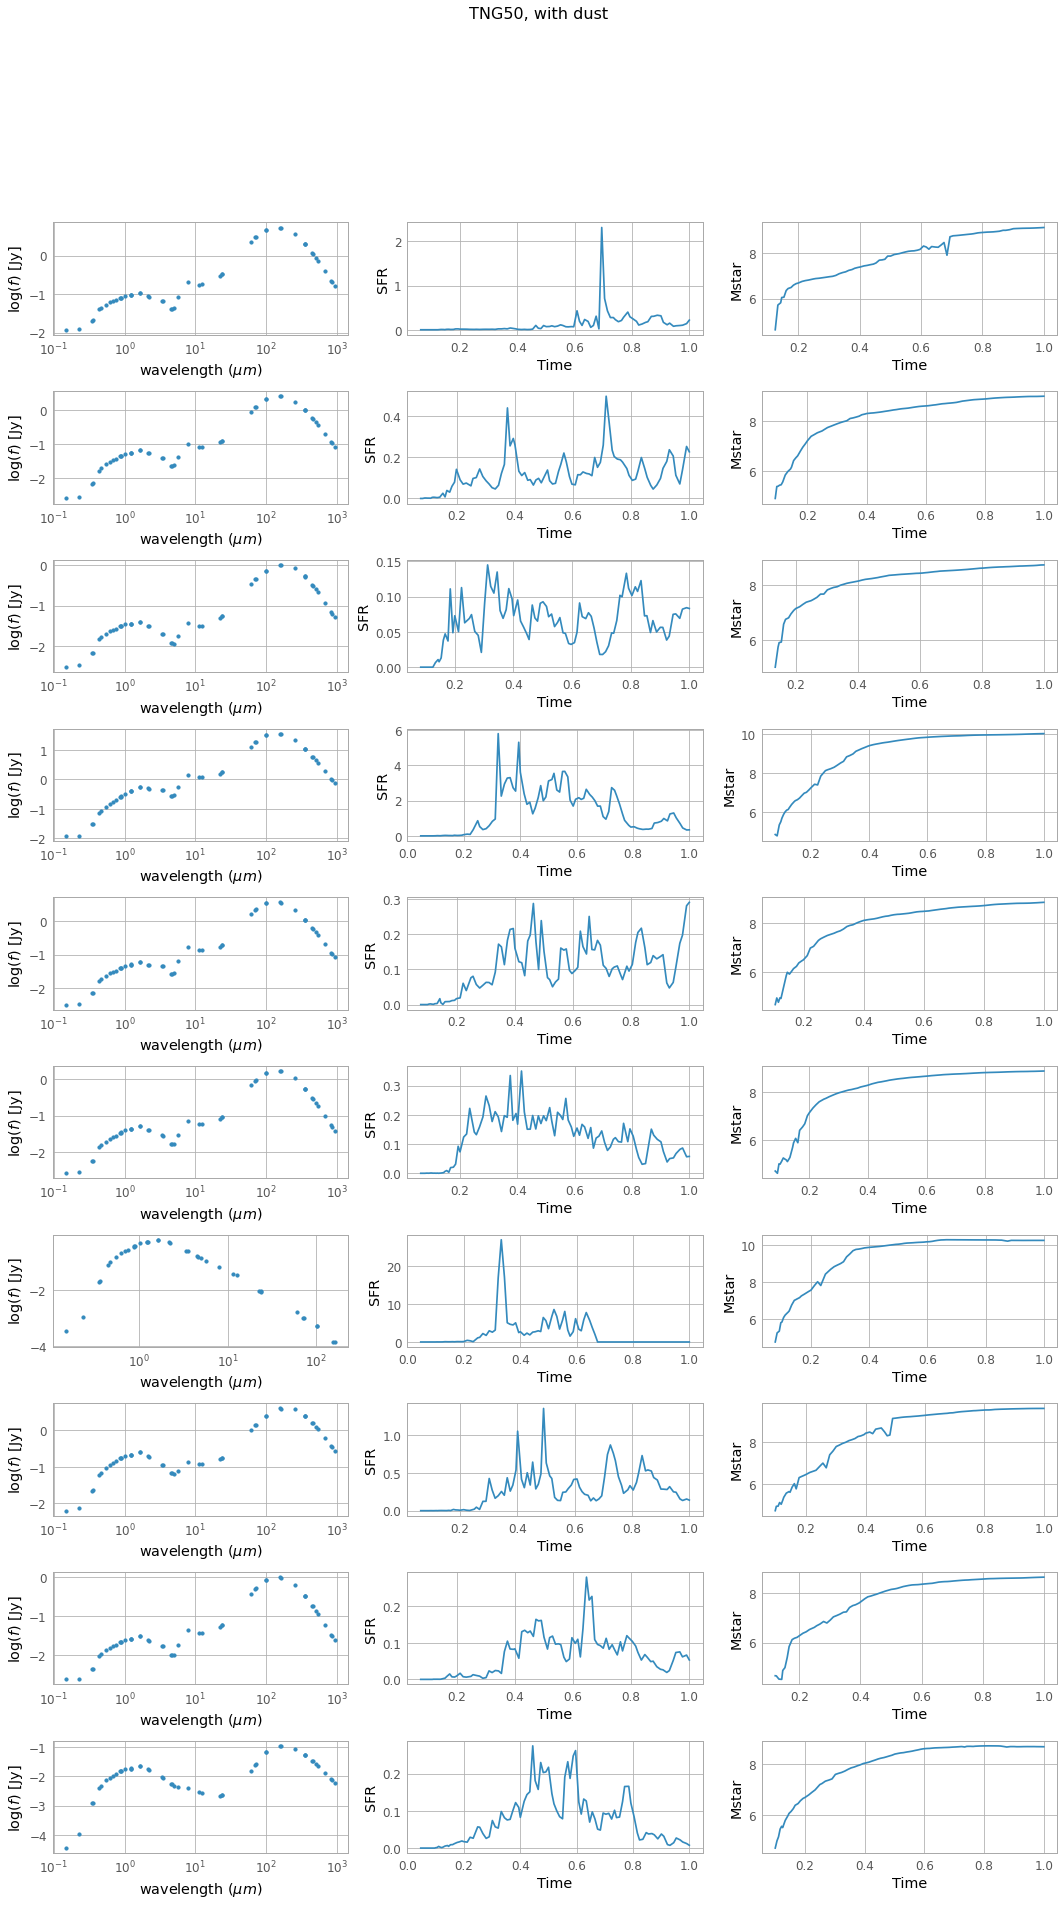

In [ ]:
from numpy import random
import re
cat_path = "$ALL_CCFRWORK/SFH/tng100/fluxes_TNG50.csv"
phot_cat = pd.read_csv(cat_path)

sfh_path = "$ALL_CCFRWORK/SFH/tng100/cats_SFH_TNG50/"
wl_cat = pd.read_csv('$ALL_CCFRWORK/SFH/tng100/wl_TNG50.csv')

wl_cat[wl_cat['filter_name'].str.contains("GALEX_FUV")==True].wl_eff
#create wl array
wl_TNG50=[]
for f in phot_cat.columns[1:]:
  fs=f.split('F_')
  wl_TNG50.append(wl_cat[wl_cat['filter_name'].str.contains(fs[1],flags=re.IGNORECASE)==True].wl_eff.values[0])
  

shids = phot_cat['GalaxyID']
phot_cat.set_index("GalaxyID", inplace=True)
phot_cat.head()
fig, axs = plt.subplots(10, 3)
fig.set_size_inches(18, 30)
fig.suptitle("TNG50, with dust", fontsize=16)
for index in range(10):
    sh = int(shids[index+random.randint(0,high=len(shids)-20)])
    obj=phot_cat.loc[sh][:]
    flux = obj.values
    #flux = 10**(-0.4*(obj.values[np.array(wl_TNG50)<3*10**4]+48.60))
    axs[index, 0].scatter(np.array(wl_TNG50)[np.array(wl_TNG50)<10**3],np.log10(flux[np.array(wl_TNG50)<10**3]),s=10)
    axs[index, 0].set_xscale('log')
    axs[index, 0].set_xlabel("wavelength ($\mu m$)")
    axs[index, 0].set_ylabel('$\log(f)$ [Jy]')
    try:
      sfh = pd.read_csv(sfh_path+"TNG50_mainprojenitors_"+str(sh)+".csv")
    except:
      continue  
      
    axs[index, 1].set_xlabel("Time")
    axs[index, 1].set_ylabel("SFR")
    axs[index, 1].plot(sfh.time,sfh.SFR_halfRad)
    axs[index, 2].plot(sfh.time,np.log10(sfh.Mstar_Half)+10)
    axs[index, 2].set_xlabel("Time")
    axs[index, 2].set_ylabel("Mstar")
plt.savefig("$WORK/TNG50_ex.pdf")    